<h1 align="center">Treating meta information</h1>

https://www.opswat.com/blog/opswat-deep-cdr-now-supports-dicom-file-format

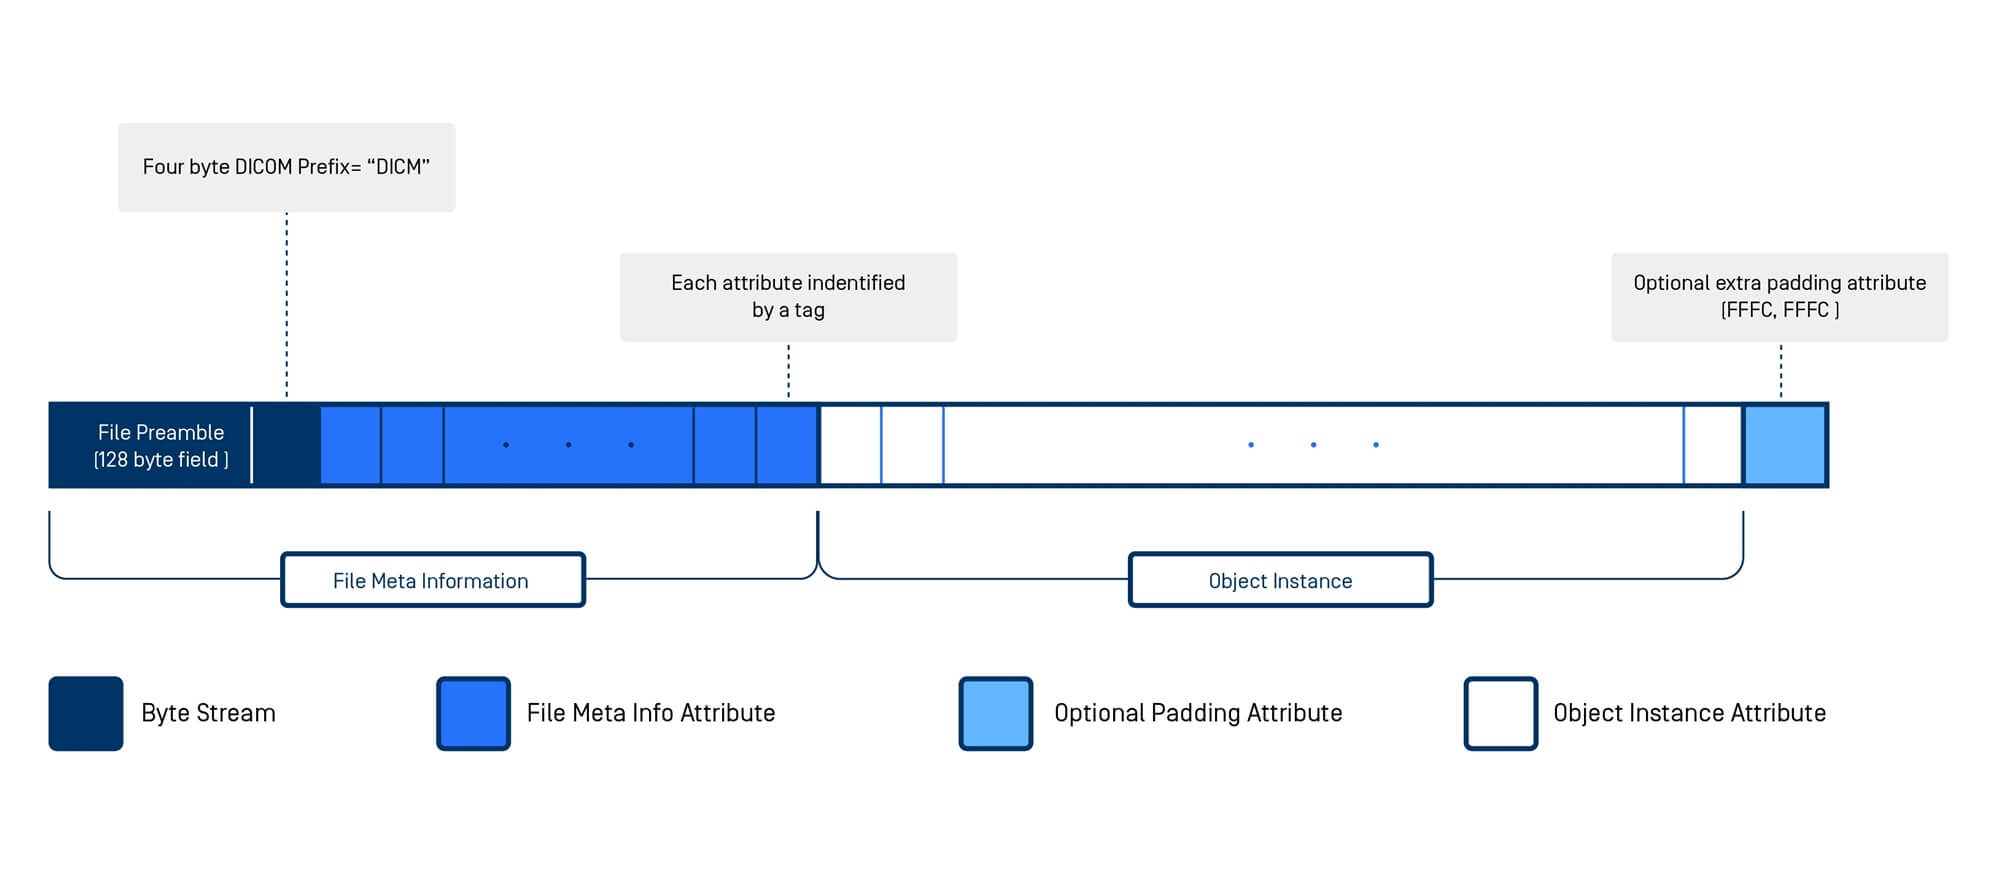

# 실습 1. 메타데이터 읽기

In [1]:
# 0. install pydicom
# !pip install pydicom --upgrade

# 1. load pydicom library
import pydicom

# 2. load sample data provided by pydicom library 
from pydicom.data import get_testdata_file
filename = get_testdata_file('MR_small.dcm')

# 3. read a DICOM file
ds = pydicom.dcmread(filename)

In [2]:
# 4. show meta-data
print(ds)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 190
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.5962.1.1.4.1.1.20040826185059.5457
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.5962.2
(0002, 0013) Implementation Version Name         SH: 'DCTOOL100'
(0002, 0016) Source Application Entity Title     AE: 'CLUNIE1'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['DERIVED', 'SECONDARY', 'OTHER']
(0008, 0012) Instance Creation Date              DA: '20040826'
(0008, 0013) Instance Creation Time              TM: '185434'
(0008, 0014) Instance Creator UID                UI: 1.3.6.1.4.1.5962.3
(0008, 0016) SOP Class UID                  

In [3]:
print("Study Date:", ds.StudyDate)
print("Patient's Name:", ds.PatientName)
print("Patient's Sex:", ds.PatientSex)

Study Date: 20040826
Patient's Name: CompressedSamples^MR1
Patient's Sex: F


# 실습 2. 메타데이터 수정 및 저장

In [ ]:
# 1. Read a DICOM file (메타정보 삭제 여부를 확인하기 위해 새로 불러옴)
ds_anonymized = pydicom.dcmread(filename)

In [ ]:
# 2. Delete desired meta-data
ds_anonymized.PatientName = ''
ds_anonymized.PatientSex = ''

In [ ]:
# 3. Checking for deleted metadata
print("'Before' anonymized")
print("Study Date:", ds.StudyDate)
print("Patient's Name:", ds.PatientName)
print("Patient's Sex:", ds.PatientSex)
print("\n")

print("'After' anonymized")
print("Study Date:", ds_anonymized.StudyDate)
print("Patient's Name:", ds_anonymized.PatientName)
print("Patient's Sex:", ds_anonymized.PatientSex)

In [ ]:
# 4. save revised DICOM file
output_filename = 'anonymized.dcm'
ds_anonymized.save_as(output_filename)

In [ ]:
# 5. Check if meta-data is deleted from modified/saved DICOM
ds_anonymized = pydicom.dcmread('anonymized.dcm')

print("'After' anonymized")
print("Study Date:", ds_anonymized.StudyDate)
print("Patient's Name:", ds_anonymized.PatientName)
print("Patient's Sex:", ds_anonymized.PatientSex)

# 실습 3. SimpleITK로 메타정보 읽기 (비추천)

In [ ]:
# 1. load SimpleITK library
import SimpleITK as sitk

# 2. read DICOM 
filename = get_testdata_file('MR_small.dcm')

reader = sitk.ImageFileReader()
reader.SetFileName(filename)
reader.LoadPrivateTagsOn()

reader.ReadImageInformation()


# print(f"Image Size: {reader.GetSize()}")
# print(f"Image PixelType: {sitk.GetPixelIDValueAsString(reader.GetPixelID())}")

In [ ]:
# 3. show all meta-data
for k in reader.GetMetaDataKeys():
    v = reader.GetMetaData(k)
    print(f'({k}) = = "{v}"')

In [ ]:
reader.GetMetaData('0028|1051')

<h1 align="center">SimpleITK Images</h1>


**Summary:**    

1. Images occupy a region in physical space which is defined by:
  * Origin.
  * Size (number of pixels per dimension).
  * Spacing (unknown consistent units: nm, mm, m, km...).
  * Direction cosine matrix (axis directions in physical space).
  
  These attributes are the image's meta-data. Computing the physical coordinates from image indexes requires all four   components.

2. An image may contain a meta-data dictionary. This supplemental information often includes the image modality (e.g. CT), patient name, and information with respect to the image acquisition. 
3. Image initialization: user specified pixel type, user specified dimensionality (2,3), origin at zero, unit spacing in all dimensions and identity direction cosine matrix, intensities set to zero.
4. Data transfer to/from numpy: GetArrayFromImage (copy), GetArrayViewFromImage (immutable), GetImageFromArray (copy) + set the meta-data yourself. 
5. A common issue with resampling resulting in an all black image is due to (a) incorrect specification of the 
desired output image's spatial domain (its meta-data); or (b) the use of the inverse of the transformation mapping from the output spatial domain to the resampled image.

<h1 align="center">SimpleITK Images</h1>


**Summary:**    

1. Images occupy a region in physical space which is defined by:
  * Origin.
  * Size (number of pixels per dimension).
  * Spacing (unknown consistent units: nm, mm, m, km...).
  * Direction cosine matrix (axis directions in physical space).
  
  These attributes are the image's meta-data. Computing the physical coordinates from image indexes requires all four   components.

2. An image may contain a meta-data dictionary. This supplemental information often includes the image modality (e.g. CT), patient name, and information with respect to the image acquisition. 
3. Image initialization: user specified pixel type, user specified dimensionality (2,3), origin at zero, unit spacing in all dimensions and identity direction cosine matrix, intensities set to zero.
4. Data transfer to/from numpy: GetArrayFromImage (copy), GetArrayViewFromImage (immutable), GetImageFromArray (copy) + set the meta-data yourself. 
5. A common issue with resampling resulting in an all black image is due to (a) incorrect specification of the 
desired output image's spatial domain (its meta-data); or (b) the use of the inverse of the transformation mapping from the output spatial domain to the resampled image.

### Pixel Types

The pixel type is represented as an enumerated type. The following is a table of the enumerated list.

<table>
  <tr><td>sitkUInt8</td><td>Unsigned 8 bit integer</td></tr>
  <tr><td>sitkInt8</td><td>Signed 8 bit integer</td></tr>
  <tr><td>sitkUInt16</td><td>Unsigned 16 bit integer</td></tr>
  <tr><td>sitkInt16</td><td>Signed 16 bit integer</td></tr>
  <tr><td>sitkUInt32</td><td>Unsigned 32 bit integer</td></tr>
  <tr><td>sitkInt32</td><td>Signed 32 bit integer</td></tr>
  <tr><td>sitkUInt64</td><td>Unsigned 64 bit integer</td></tr>
  <tr><td>sitkInt64</td><td>Signed 64 bit integer</td></tr>
  <tr><td>sitkFloat32</td><td>32 bit float</td></tr>
  <tr><td>sitkFloat64</td><td>64 bit float</td></tr>
  <tr><td>sitkComplexFloat32</td><td>complex number of 32 bit float</td></tr>
  <tr><td>sitkComplexFloat64</td><td>complex number of 64 bit float</td></tr>
  <tr><td>sitkVectorUInt8</td><td>Multi-component of unsigned 8 bit integer</td></tr>
  <tr><td>sitkVectorInt8</td><td>Multi-component of signed 8 bit integer</td></tr>
  <tr><td>sitkVectorUInt16</td><td>Multi-component of unsigned 16 bit integer</td></tr>
  <tr><td>sitkVectorInt16</td><td>Multi-component of signed 16 bit integer</td></tr>
  <tr><td>sitkVectorUInt32</td><td>Multi-component of unsigned 32 bit integer</td></tr>
  <tr><td>sitkVectorInt32</td><td>Multi-component of signed 32 bit integer</td></tr>
  <tr><td>sitkVectorUInt64</td><td>Multi-component of unsigned 64 bit integer</td></tr>
  <tr><td>sitkVectorInt64</td><td>Multi-component of signed 64 bit integer</td></tr>
  <tr><td>sitkVectorFloat32</td><td>Multi-component of 32 bit float</td></tr>
  <tr><td>sitkVectorFloat64</td><td>Multi-component of 64 bit float</td></tr>
  <tr><td>sitkLabelUInt8</td><td>RLE label of unsigned 8 bit integers</td></tr>
  <tr><td>sitkLabelUInt16</td><td>RLE label of unsigned 16 bit integers</td></tr>
  <tr><td>sitkLabelUInt32</td><td>RLE label of unsigned 32 bit integers</td></tr>
  <tr><td>sitkLabelUInt64</td><td>RLE label of unsigned 64 bit integers</td></tr>
</table>

There is also `sitkUnknown`, which is used for undefined or erroneous pixel ID's.

Some filters only work with images with a specific pixel type. The primary example is the registration framework which works with sitkFloat32 or sitkFloat64. To address this issue you can either specify the appropriate pixel type when reading or creating the image, or use the <a href="https://itk.org/SimpleITKDoxygen/html/namespaceitk_1_1simple.html#af8c9d7cc96a299a05890e9c3db911885">Cast function</a>.  

In [4]:
import SimpleITK as sitk

import numpy as np
# import os
# from ipywidgets import interact, fixed

%matplotlib inline
import matplotlib.pyplot as plt

from downloaddata import fetch_data as fdata
OUTPUT_DIR = 'output'

image_viewer = sitk.ImageViewer()

## Image Creation

The following components are required for a complete definition of an image:
<ol>
<li>Pixel type [fixed on creation, no default]: unsigned 32 bit integer, sitkVectorUInt8, etc., see list above.</li>
<li> Sizes [fixed on creation, no default]: number of pixels/voxels in each dimension. This quantity implicitly defines the image dimension.</li>
<li> Origin [default is zero]: coordinates of the pixel/voxel with index (0,0,0) in physical units (i.e. mm).</li>
<li> Spacing [default is one]: Distance between adjacent pixels/voxels in each dimension given in physical units.</li>
<li> Direction matrix [default is identity]: mapping, rotation, between direction of the pixel/voxel axes and physical directions.</li>
</ol>

Initial pixel/voxel values are set to zero.

In [9]:
image_3D = sitk.Image(256, 128, 64, sitk.sitkInt16)
image_2D = sitk.Image(64, 64, sitk.sitkFloat32)
image_RGB = sitk.Image([128,64], sitk.sitkVectorUInt8, 3)

print(sitk.GetArrayViewFromImage(image_3D).shape)
print(sitk.GetArrayViewFromImage(image_2D).shape)
print(sitk.GetArrayViewFromImage(image_RGB).shape)

# Definition of coordinate system is different!!
# Python (H, W) - SimpleITK (W, H)

(64, 128, 256)
(64, 64)
(64, 128, 3)


Or, creation from file.

Fetching SimpleITK.jpg


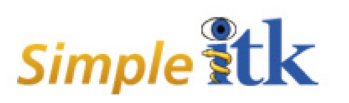

In [6]:
logo = sitk.ReadImage(fdata('SimpleITK.jpg'))

# GetArrayViewFromImage returns an immutable numpy array view to the data.
plt.imshow(sitk.GetArrayViewFromImage(logo))
plt.axis('off');

## Basic Image Attributes (Meta-Data)

You can change the image origin, spacing and direction. Making such changes to an image already containing data should be done cautiously. 

In [7]:
selected_image = image_3D
print('Before modification:')
print('origin: ' + str(selected_image.GetOrigin()))
print('size: ' + str(selected_image.GetSize()))
print('spacing: ' + str(selected_image.GetSpacing()))
print('direction: ' + str(selected_image.GetDirection()))
print('pixel type: ' + str(selected_image.GetPixelIDTypeAsString()))
print('number of pixel components: ' + str(selected_image.GetNumberOfComponentsPerPixel()))

selected_image.SetOrigin((78.0, 76.0, 77.0))
selected_image.SetSpacing([0.5,0.5,3.0])

print('\nAfter modification:')
print('origin: ' + str(selected_image.GetOrigin()))
print('spacing: ' + str(selected_image.GetSpacing()))

Before modification:
origin: (0.0, 0.0, 0.0)
size: (256, 128, 64)
spacing: (1.0, 1.0, 1.0)
direction: (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
pixel type: 16-bit signed integer
number of pixel components: 1

After modification:
origin: (78.0, 76.0, 77.0)
spacing: (0.5, 0.5, 3.0)


In [8]:
# what if 2D?
selected_image = image_2D
print('Before modification:')
print('origin: ' + str(selected_image.GetOrigin()))
print('size: ' + str(selected_image.GetSize()))
print('spacing: ' + str(selected_image.GetSpacing()))
print('direction: ' + str(selected_image.GetDirection()))
print('pixel type: ' + str(selected_image.GetPixelIDTypeAsString()))
print('number of pixel components: ' + str(selected_image.GetNumberOfComponentsPerPixel()))

selected_image.SetOrigin((78.0, 76.0, 77.0))
selected_image.SetSpacing([0.5,0.5,3.0])

print('\nAfter modification:')
print('origin: ' + str(selected_image.GetOrigin()))
print('spacing: ' + str(selected_image.GetSpacing()))

Before modification:
origin: (0.0, 0.0)
size: (64, 64)
spacing: (1.0, 1.0)
direction: (1.0, 0.0, 0.0, 1.0)
pixel type: 32-bit float
number of pixel components: 1

After modification:
origin: (78.0, 76.0)
spacing: (0.5, 0.5)


## Accessing Pixels and Slicing

Either use the ``GetPixel`` and ``SetPixel`` functions or the Pythonic slicing operator. The access functions and image slicing operator are in [x,y,z] order.

In [ ]:
print(image_3D.GetPixel(0, 0, 0))
image_3D.SetPixel(0, 0, 0, 1)
print(image_3D.GetPixel(0, 0, 0))

# This can also be done using Pythonic notation.
print(image_3D[0,0,1])
image_3D[0,0,1] = 2
print(image_3D[0,0,1])

# We can also paste one image into the other using
# slicing. We'll first make a copy of the logo image, flip
# part of it and paste back in place.
logo_copy = sitk.Image(logo)
height = logo_copy.GetHeight()
logo_copy[115:190,0:height] = logo_copy[190:115:-1,0:height]
plt.imshow(sitk.GetArrayViewFromImage(logo_copy))
plt.axis('off');

In [ ]:
# Brute force sub-sampling 
logo_subsampled = logo[::2,::2]

# Get the sub-image containing the word Simple
simple = logo[0:115,:]

# Get the sub-image containing the word Simple and flip it
simple_flipped = logo[115:0:-1,:]

n = 4

plt.subplot(n,1,1)
plt.imshow(sitk.GetArrayViewFromImage(logo))
plt.axis('off');

plt.subplot(n,1,2)
plt.imshow(sitk.GetArrayViewFromImage(logo_subsampled))
plt.axis('off');

plt.subplot(n,1,3)
plt.imshow(sitk.GetArrayViewFromImage(simple))
plt.axis('off')

plt.subplot(n,1,4)
plt.imshow(sitk.GetArrayViewFromImage(simple_flipped))
plt.axis('off');

## Image operations

SimpleITK supports basic arithmetic operations between images while taking into account their meta-data. Images must physically overlap (pixel by pixel).

How close do physical attributes (meta-data values) need to be in order to be considered equivalent?

In [ ]:
img_width = 128
img_height = 64
img1 = sitk.Image((img_width, img_height), sitk.sitkUInt8)
for i in range(img_width):
    img1[i,1] = 5

img2 = sitk.Image(img1.GetSize(), sitk.sitkUInt8)
# img2.SetDirection([0,1,0.5,0.5])
img2.SetOrigin([0.000001,0.000001])
for i in range(img_width):
    img2[i,1] = 120
    img2[i,img_height//2] = 60

# Add the two images (upper line has a value of 125, and lower of 60) 
img3 = img1 + img2

plt.imshow(sitk.GetArrayViewFromImage(img3), cmap=plt.cm.Greys_r)
plt.axis('off');

In [ ]:
#operations can also be done in place
img1+=img2
plt.imshow(sitk.GetArrayViewFromImage(img1), cmap=plt.cm.Greys_r)
plt.axis('off');

Comparative operators (&gt;, &gt;=, &lt;, &lt;=, ==) are also supported, returning binary images.

In [ ]:
thresholded_image = img3>50
plt.imshow(sitk.GetArrayViewFromImage(thresholded_image), cmap=plt.cm.Greys_r)
plt.axis('off');

## SimpleITK2Numpy and Numpy2SimpleITK

SimpleITK and numpy indexing access is in opposite order! 

SimpleITK: image[x,y,z]<br>
numpy: image_numpy_array[z,y,x]

### SimpleITK2Numpy

1. ```GetArrayFromImage()```: returns a copy of the image data. You can then freely modify the data as it has no effect on the original SimpleITK image.
2. ```GetArrayViewFromImage()```: returns a view on the image data which is useful for display in a memory efficient manner. You cannot modify the data and __the view will be invalid if the original SimpleITK image is deleted__.

### Numpy2SimpleITK
1. ```GetImageFromArray()```: returns a SimpleITK image with origin set to zero, spacing set to one for all dimensions, and the direction cosine matrix set to identity. Intensity data is copied from the numpy array. __In most cases you will need to set appropriate meta-data values.__ 


In [ ]:
nda = sitk.GetArrayFromImage(image_3D)
print(image_3D.GetSize())
print(nda.shape)

nda = sitk.GetArrayFromImage(image_RGB)
print(image_RGB.GetSize())
print(nda.shape)

In [ ]:
gabor_image = sitk.GaborSource(size=[64,64], frequency=.03)
# Getting a numpy array view on the image data doesn't copy the data
nda_view = sitk.GetArrayViewFromImage(gabor_image)
plt.imshow(nda_view, cmap=plt.cm.Greys_r)
plt.axis('off');

In [ ]:
nda = np.zeros((10,20,3))

        #if this is supposed to be a 3D gray scale image [x=3, y=20, z=10]
img = sitk.GetImageFromArray(nda)
print(img.GetSize())

      #if this is supposed to be a 2D color image [x=20,y=10]
img = sitk.GetImageFromArray(nda, isVector=True)
print(img.GetSize())

## Reading and Writing

SimpleITK can read and write images stored in a single file, or a set of files (e.g. DICOM series). The toolkit provides both an object oriented and a procedural interface. The primary difference being that the object oriented approach provides more control while the procedural interface is more convenient.

We look at DICOM images as an example illustrating this difference. Images stored in the DICOM format have a meta-data dictionary associated with them, which is populated with the DICOM tags. When a DICOM image series is read as a single image volume, the resulting image's meta-data dictionary is not populated since DICOM tags are specific to each of the files in the series. If you use the procedural method for reading the series then you do not have access to the set of meta-data dictionaries associated with each of the files. To obtain each dictionary you will have to access each of the files separately. On the other hand, if you use the object oriented interface, the set of dictionaries will be accessible from the ```ImageSeriesReader``` which you used to read the DICOM series. The meta-data dictionary for each file is available using the <a href="https://itk.org/SimpleITKDoxygen/html/classitk_1_1simple_1_1ImageSeriesReader.html#a337b19b6bc101f5571455afb46514b6d">HasMetaDataKey</a> and <a href="https://itk.org/SimpleITKDoxygen/html/classitk_1_1simple_1_1ImageSeriesReader.html#a19995f33b86c60e2ae4878cb4d8c30ee">GetMetaData</a> methods. 

We start with reading and writing an image using the procedural interface.

In [ ]:
img = sitk.ReadImage(fdata('SimpleITK.jpg'))
sitk.WriteImage(img, os.path.join(OUTPUT_DIR, 'SimpleITK.png'))

Read an image in JPEG format and cast the pixel type according to user selection.

In [ ]:
# Several pixel types, some make sense in this case (vector types) and some are just show
# that the user's choice will force the pixel type even when it doesn't make sense.
pixel_types = { 'sitkVectorUInt8' : sitk.sitkVectorUInt8,
                'sitkVectorUInt16' : sitk.sitkVectorUInt16,
                'sitkVectorFloat64' : sitk.sitkVectorFloat64}

def pixel_type_dropdown_callback(pixel_type, pixel_types_dict):
    #specify the file location and the pixel type we want
    img = sitk.ReadImage(fdata('SimpleITK.jpg'), pixel_types_dict[pixel_type])
    
    print(img.GetPixelIDTypeAsString())
    print(img[0,0])
    plt.imshow(sitk.GetArrayViewFromImage(img))
    plt.axis('off')
 
interact(pixel_type_dropdown_callback, pixel_type=list(pixel_types.keys()), pixel_types_dict=fixed(pixel_types));     

Read a DICOM series and write it as a single mha file.

In [ ]:
data_directory = os.path.dirname(fdata("CIRS057A_MR_CT_DICOM/readme.txt"))
series_ID = '1.2.840.113619.2.290.3.3233817346.783.1399004564.515'

# Use the functional interface to read the image series.
original_image = sitk.ReadImage(sitk.ImageSeriesReader_GetGDCMSeriesFileNames(data_directory,series_ID))

# Write the image.
output_file_name_3D = os.path.join(OUTPUT_DIR, '3DImage.mha')
sitk.WriteImage(original_image, output_file_name_3D)

Select a specific DICOM series from a directory and only then load user selection.

In [ ]:
data_directory = os.path.dirname(fdata("CIRS057A_MR_CT_DICOM/readme.txt"))
# Global variable 'selected_series' is updated by the interact function
selected_series = ''
file_reader = sitk.ImageFileReader()
def DICOM_series_dropdown_callback(series_to_load, series_dictionary):
    global selected_series
               # Print some information about the series from the meta-data dictionary
               # DICOM standard part 6, Data Dictionary: http://medical.nema.org/medical/dicom/current/output/pdf/part06.pdf
    file_reader.SetFileName(series_dictionary[series_to_load][0])
    file_reader.ReadImageInformation()
    tags_to_print = {'0010|0010': 'Patient name: ', 
                     '0008|0060' : 'Modality: ',
                     '0008|0021' : 'Series date: ',
                     '0008|0080' : 'Institution name: ',
                     '0008|1050' : 'Performing physician\'s name: '}
    for tag in tags_to_print:
        try:
            print(tags_to_print[tag] + file_reader.GetMetaData(tag))
        except: # Ignore if the tag isn't in the dictionary
            pass
    selected_series = series_to_load                    

# Directory contains multiple DICOM studies/series, store
# in dictionary with key being the series ID
series_file_names = {}
series_IDs = sitk.ImageSeriesReader_GetGDCMSeriesIDs(data_directory)
            # Check that we have at least one series
if series_IDs:
    for series in series_IDs:
        series_file_names[series] = sitk.ImageSeriesReader_GetGDCMSeriesFileNames(data_directory, series)
    
    interact(DICOM_series_dropdown_callback, series_to_load=list(series_IDs), series_dictionary=fixed(series_file_names)); 
else:
    print('Data directory does not contain any DICOM series.')

In [ ]:
img = sitk.ReadImage(series_file_names[selected_series])
# Display the image slice from the middle of the stack, z axis
z = img.GetDepth()//2
plt.imshow(sitk.GetArrayViewFromImage(img)[z,:,:], cmap=plt.cm.Greys_r)
plt.axis('off');

Write the volume as a series of JPEGs. The WriteImage function receives a volume and a list of images names and writes the volume according to the z axis. For a displayable result we need to rescale the image intensities (default is [0,255]) since the JPEG format requires a cast to the UInt8 pixel type.

In [ ]:
sitk.WriteImage(sitk.Cast(sitk.RescaleIntensity(img), sitk.sitkUInt8), 
                [os.path.join(OUTPUT_DIR, 'slice{0:03d}.jpg'.format(i)) for i in range(img.GetSize()[2])]) 